# Jendela

Bagaimana kita mendesain fungsi Jendela untuk mendapatkan attenuasi pita henti yang lebih tinggi? Ada 2 versi, untuk jendela dengan panjang genap dan ganjil. Sekarang kita akan menganalisis beberapa jenis jendela umum.

Mari kita mulai lagi dengan jendela persegi. h(n)=1, untuk n=0,...,L-1.

Dalam Python kita mendapatkan respon frekuensinya untuk L=16:

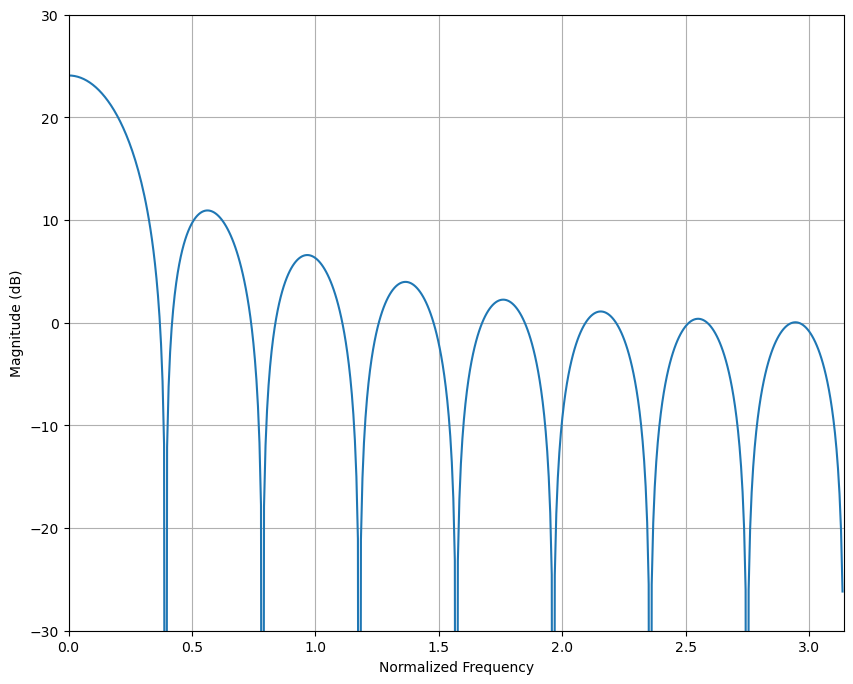

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

Perhatikan: Lob utamanya memiliki lebar 3dB sekitar 0.05π≈0.16, attenuasi sisi lob adalah sekitar -15 hingga -25 dB. Kita dapat merancang jendela yang berbeda, yang mengurangi penekanan dari wilayah transisi dari pita lintas ke pita henti, dan menekankan attenuasi pita henti lebih dari attenuasi pita lintas.

Ini dapat dilihat sebagai meminimalkan fungsi kesalahan kuadrat yang terbobot, di mana bagian yang ingin kita tekankan mendapatkan bobot yang lebih tinggi.

Dalam Python, kita dapat merumuskan fungsi kesalahan dengan kesalahan kuadrat yang terbobot sebagai berikut, dengan pb, tb: jumlah sampel frekuensi di pita lintas dan pita transisi, secara berturut-turut,

In [2]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512
    
    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)
    
    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

## Lihat H yang Diinginkan dan Bobot

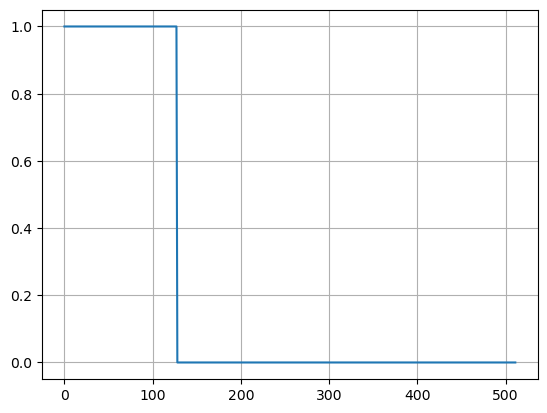

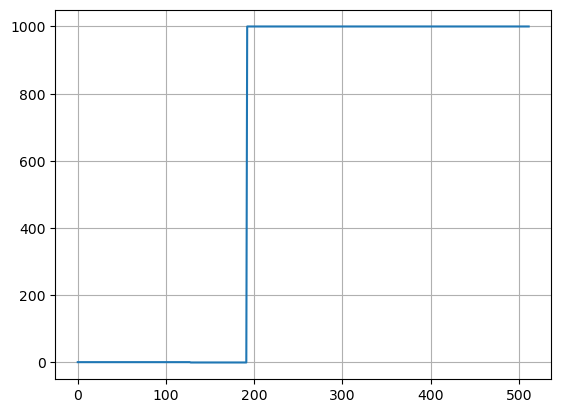

In [3]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512
    
#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

Kemudian kita dapat menerapkan optimisasi untuk mendapatkan sampel jendela atau filter yang meminimalkan kesalahan ini, misalnya menggunakan "scipy.optimize". Dalam contoh ini, sebuah jendela atau filter h (tergantung pada bagaimana digunakan) dari panjang 16 sampel atau taps diperoleh dengan:

In [4]:
import scipy.optimize as opt

minout=opt.minimize(errfunc,np.random.rand(16))
h=minout.x
print(h)
[-0.00028433 -0.0013443  -0.00396331 -0.00901458 -0.01664832 -0.02586522
 -0.0344325  -0.03971832 -0.03994815 -0.03504098 -0.02663534 -0.01727224
 -0.00929192 -0.00396101 -0.00124255 -0.0002329 ]

[-0.00021857 -0.00132519 -0.0045182  -0.01109651 -0.02138197 -0.03392134
 -0.04561919 -0.05281129 -0.05305904 -0.04634309 -0.034961   -0.02251689
 -0.01207773 -0.00515826 -0.0016181  -0.00030202]


[-0.26489597]

Kita mendapatkan sampel atau respon impuls sebagai:

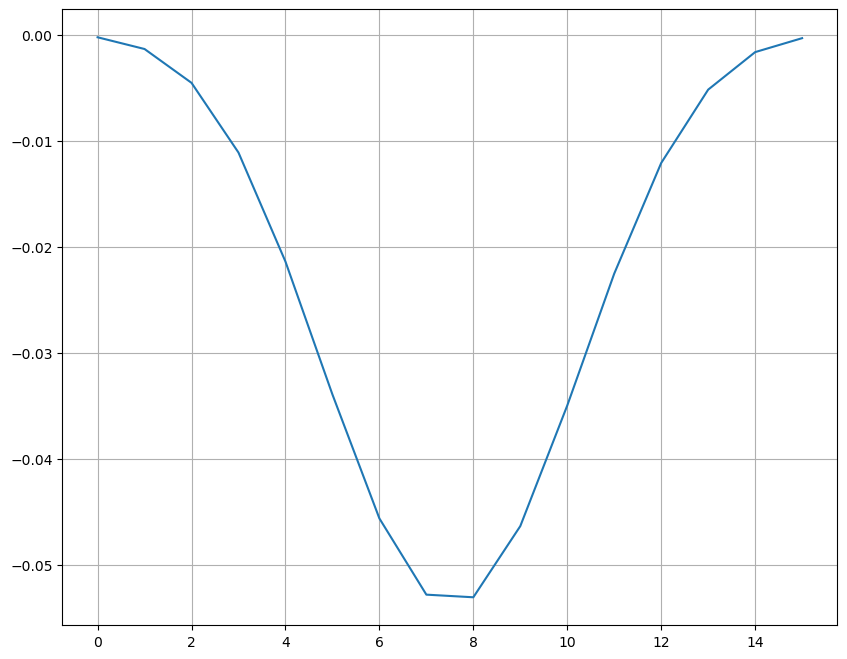

In [5]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Perhatikan: tanda negatif tidak penting, karena kita hanya mengoptimalkan untuk magnitudo. Magnitudo dari respon frekuensinya adalah,

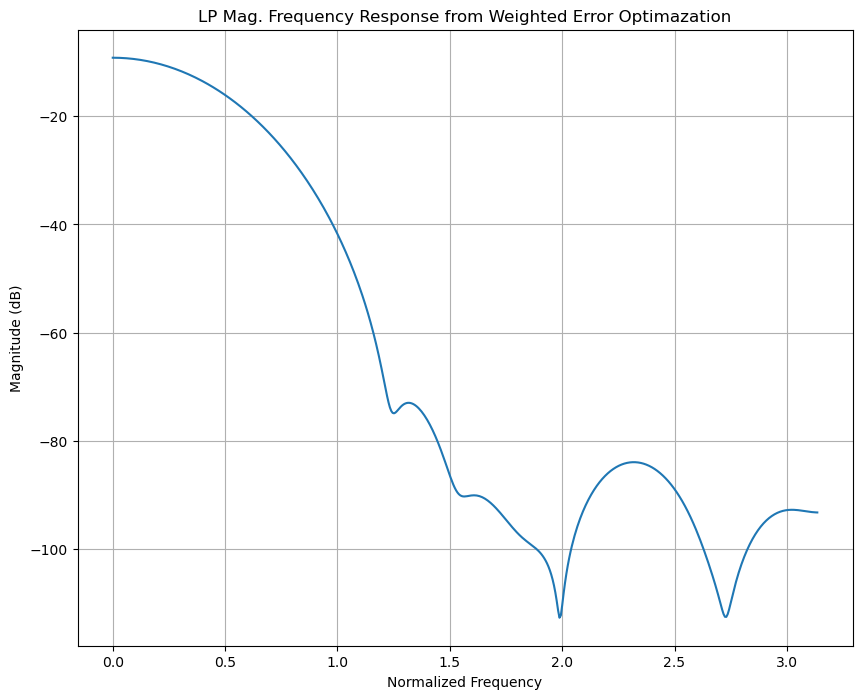

In [6]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

Perhatikan attenuasi pita henti yang cukup tinggi sekitar -80 dB!n.

Biasanya, optimisasi ini memberikan jawaban terbaik untuk sebagian besar aplikasi. Tetapi ada juga jendela yang lebih "siap pakai" untuk desain filter, dengan trade-off yang berbeda antara lebar pita transisi dan attenuasi pita henti, untuk kenyamanan.

## Jendela Raised Cosine (Jendela Hann atau Hanning)

Yang pertama adalah jendela raised cosine, juga dikenal sebagai jendela Hann atau Hanning:gan:

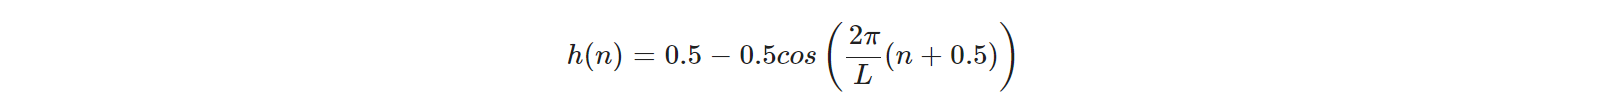

,dengan n=0,…,L-1 untuk panjang jendela genap.

Sebagai contoh raised cosine dengan panjang jendela genap dan L=16: Kita dapatkan plotnya dengan:

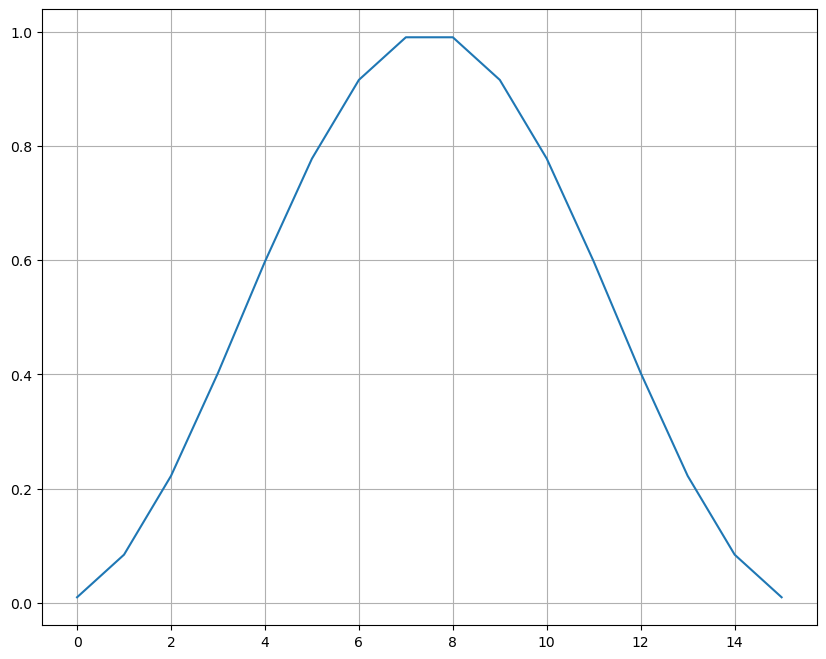

In [7]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Perhatikan: Pusatnya berada di antara 2 sampel!

Respon frekuensinya diperoleh dengan freqz:

In [9]:
def freqz(x):
    # get frequency bins and according magnitude values 
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi 

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

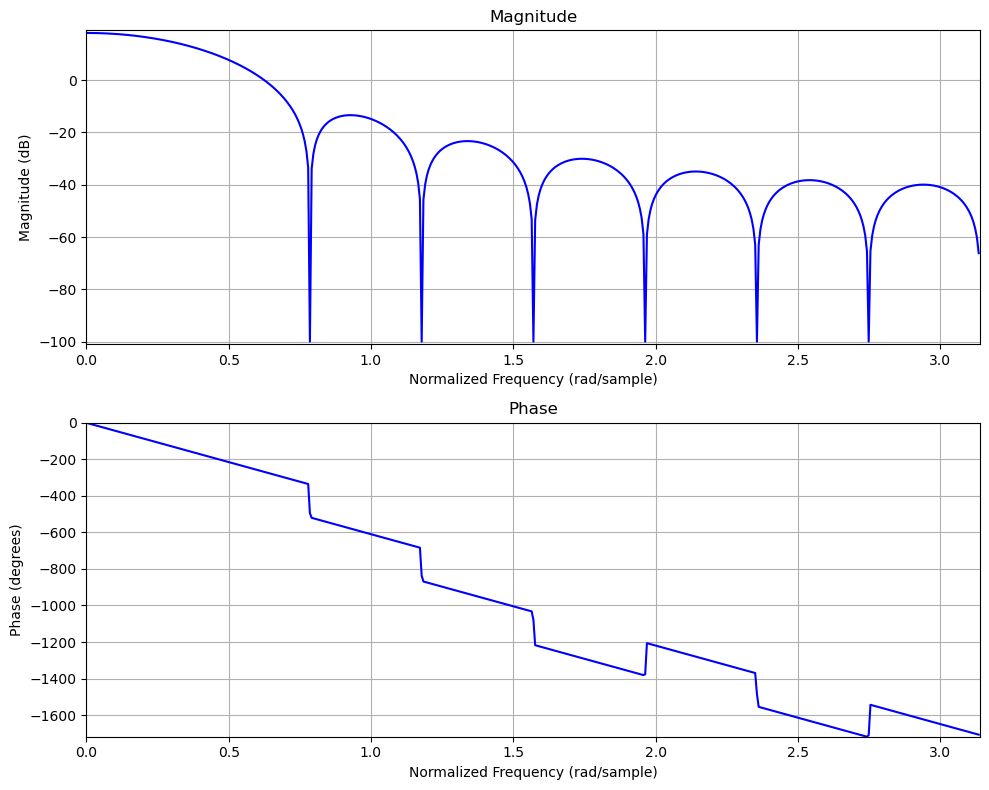

In [10]:
freqz(h)

Di sini kita bisa melihat bahwa kita juga mendapatkan attenuasi yang jauh lebih tinggi (dibandingkan dengan fungsi persegi) untuk sisi lob pertama, lebih dari -35 dB (diukur dari maksimum lobe utama, pita lintas), dan jauh di pita henti kita mendapatkan attenuasi sekitar -60 dB!

Tetapi dengan biaya lobe utama yang lebih lebar (lebarnya 3dB sekitar 0.1π, dua kali lebih lebar dari jendela persegi), yang menghasilkan pita transisi yang lebih lebaatkan:

Ini menunjukkan trade-off umum: Kita bisa menukar lebar transisi untuk attenuasi pita henti.

Untuk panjang jendela ganjil, kita mendapatkan:

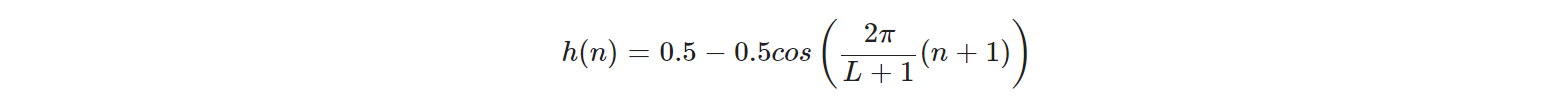

, dengan n=0,…,L-1.

Contoh untuk L=17 (jumlah sampel dari respon impuls, sama dengan koefisien, karena ini mewakili filter FIR):

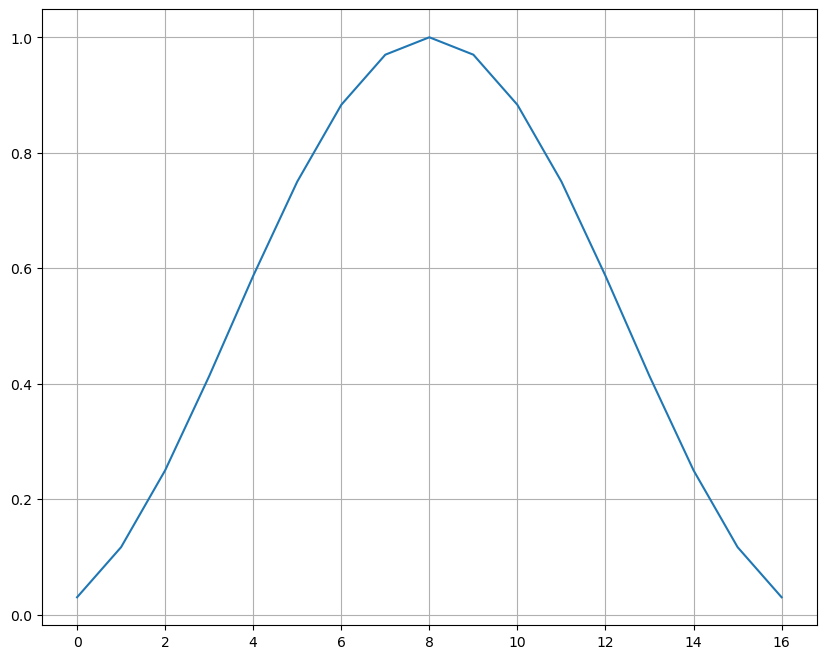

In [11]:
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Perhatikan: Di sini pusatnya tepat berada pada satu sampel!

Untuk jendela Sinus, kita mendapatkauk L=16:

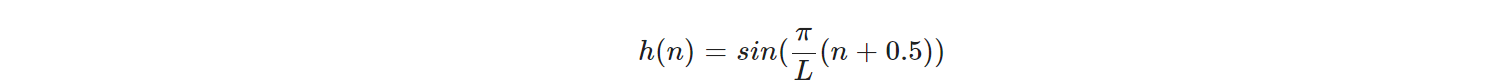

,dengan n=0,…,L-1 untuk panjang jendela genap L, atau

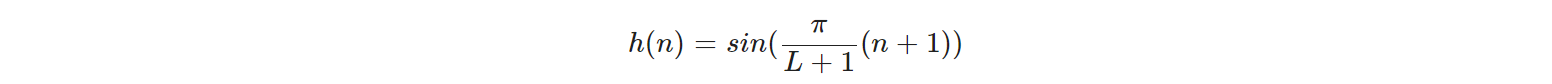

,dengan n=0,…,L-1 untuk panjang jendela ganjil L.

Contoh untuk L=16:

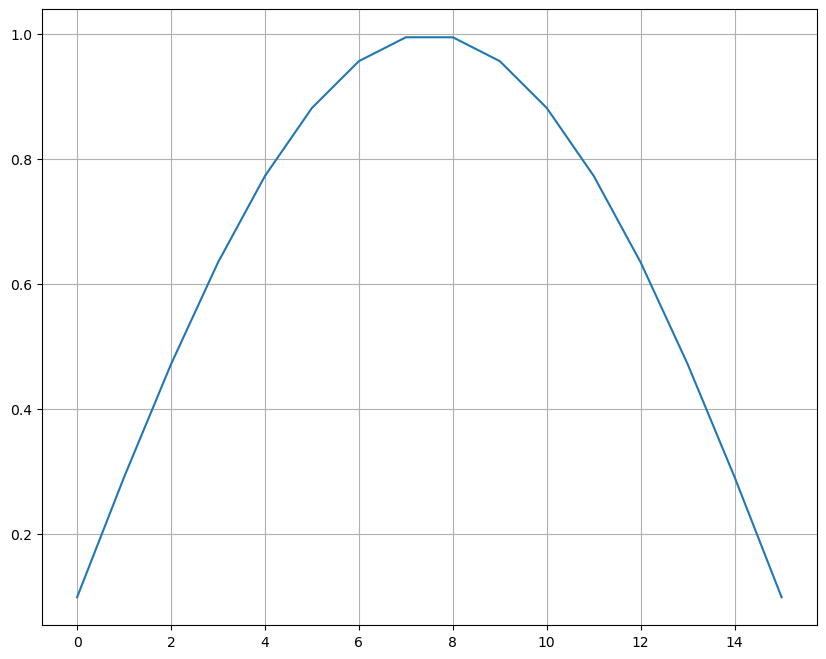

In [12]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()

Respon frekuensinya adalah:

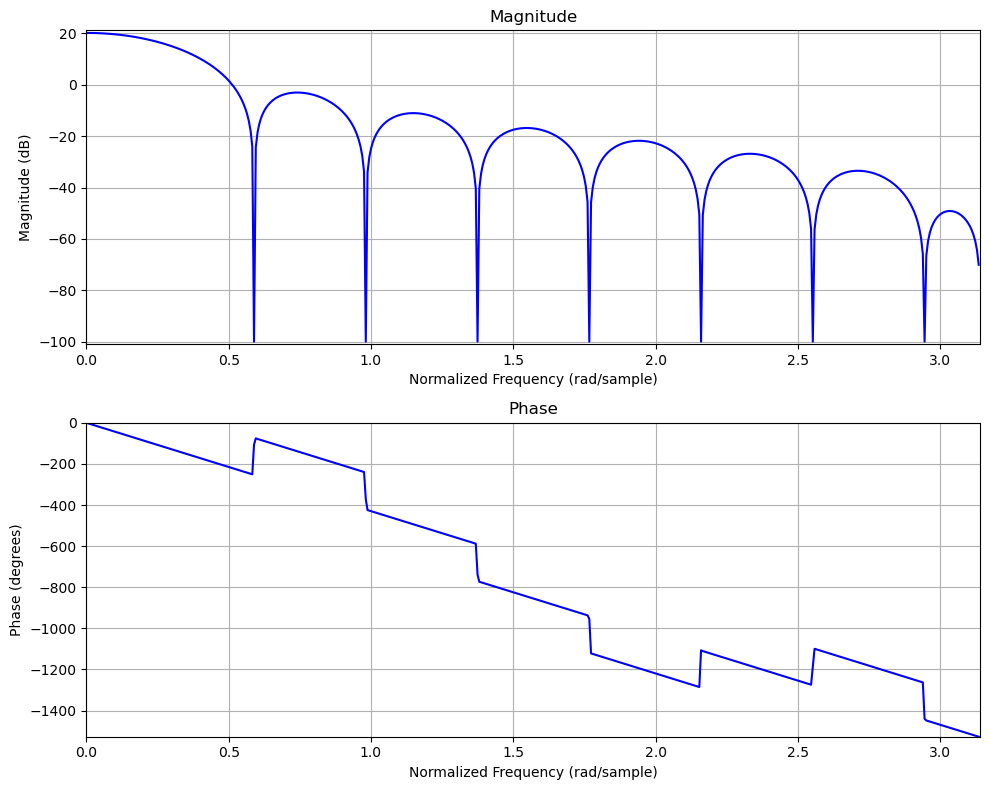

In [13]:
freqz(s)

Di sini kita bisa melihat bahwa lobe utama sedikit lebih sempit daripada jendela raised cosine, dengan lebar 3dB sekitar 0,04π, tetapi lobe sisi pertama hanya memiliki attenuasi sekitar -20 dB. Namun, lobe sisi lebih lanjut meningkat dalam attenuasi. Attenuasi ini lebih dari jendela persegi, tetapi kurang dari jendela raised cosine. Di sisi lain, lebarnya pita transisinya kurang dari jendela raised cosine.

Perhatikan bahwa ini selalu menghasilkan nilai positif untuk fungsi jendela, dan bahwa mereka sempurna simetris (untuk panjang ganjil ada sampel tepat di pusat, untuk jendela panjang genap pusatnya tepat di antara 2 sampel pusat).

## Jendela Kaiser

Jendela Kaiser yang cukup terkenal:iPython:

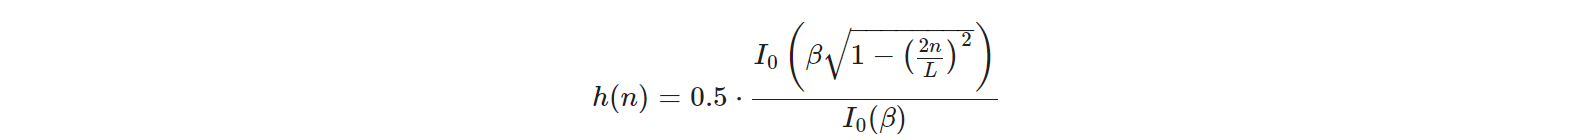

(di mana fungsi Bessel digunakan),

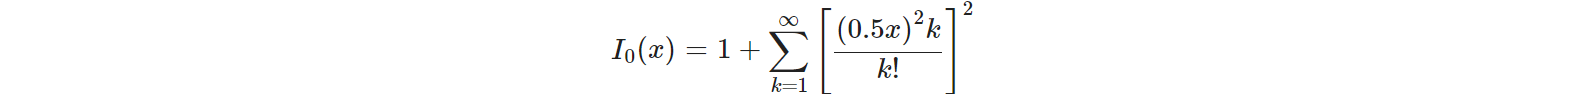

di mana dalam desain praktis sering kali digunakan 20 istilah pertama (Strang, Nguyen, "Wavelets and Filter Banks"). Parameter β digunakan untuk menukar lebar pita transisi dari filter dan attenuasi pita henti.

Contoh untuk L=16 dan β=2, dengan iPython:

In [ ]:
hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Kita dapatkan respon frekuensinya dengan:

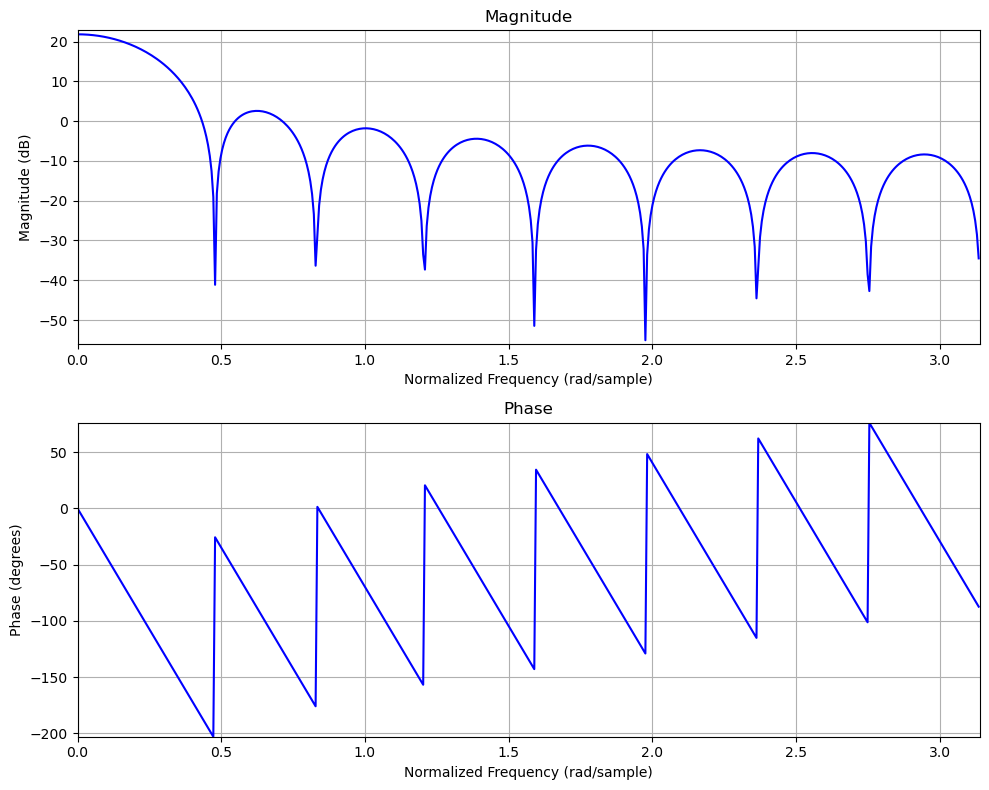

In [15]:
freqz(hk)

Di sini kita bisa melihat bahwa lobe utama (pita lintas dan pita transisi), untuk nilai β ini, bahkan lebih sempit daripada jendela sinus, lobe sisi pertama juga memiliki attenuasi sekitar -20 dB, tetapi lobe sisi lebih lanjut tidak memiliki peningkatan attenuasi yang signifikan.

Untuk β=8 kita dapatkan:

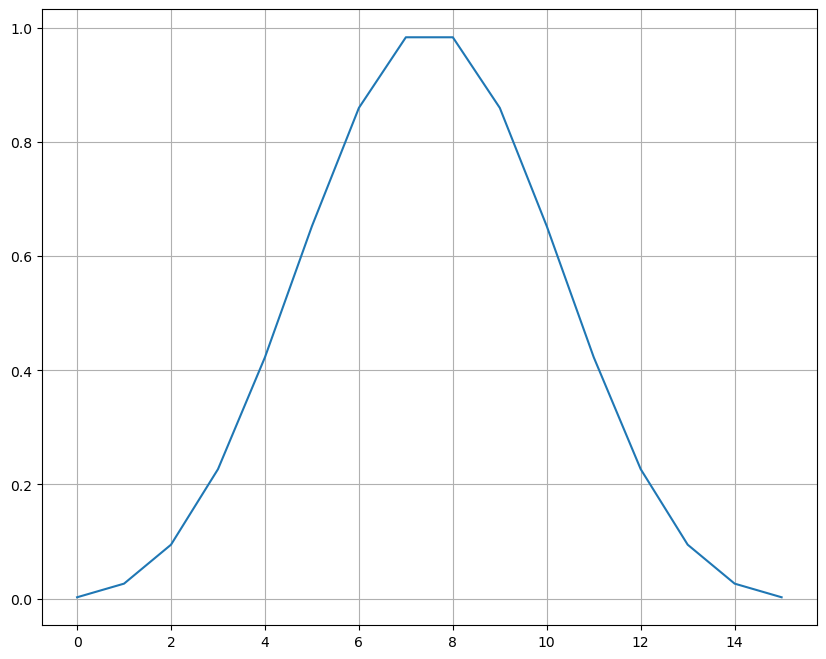

In [16]:
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Dan untuk respon frekuensinya kita dapatkan:

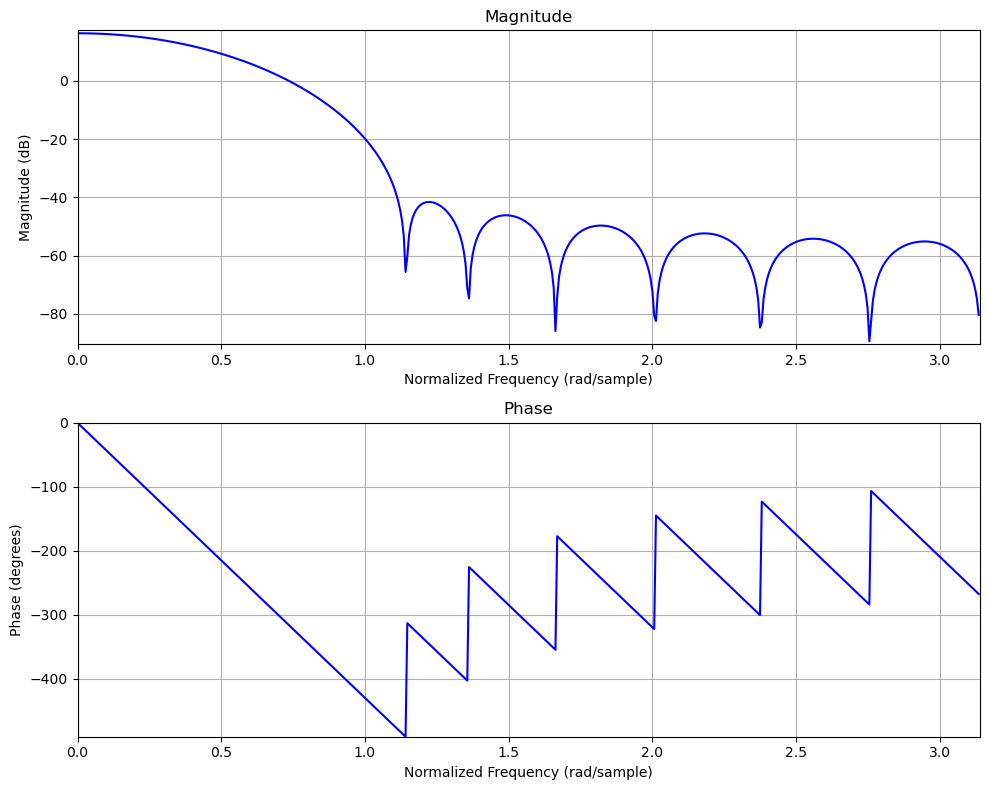

In [17]:
freqz(hk)

Di sini sekarang kita bisa melihat ekstrim lainnya, dengan lobe utama yang sangat lebar (pita lintas dan pita transisi), tetapi lobe sisi pertama dengan attenuasi sekitar -60 dB, yang akan memenuhi persyaratan kita!